<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/carprice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# strategy
# missing & duplicated: 
# poly
# standardscaler
# xgbclassifier
# score: rmse

In [2]:
import pandas as pd
import numpy as np
SEED = 49

In [3]:
raw = pd.read_csv('https://raw.githubusercontent.com/kmouleejunhyuk/bigdata_analysist_practical/main/CarPrice_Assignment.csv')

In [4]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(raw, test_size = 0.2)
# train.reset_index(inplace = True)
# test.reset_index(inplace = True)
# train.shape, test.shape

In [5]:
raw.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
raw.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
##missing & duplicated
raw.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
raw.duplicated().sum()

0

In [10]:
#범주형 데이터의 종류와 비율 확인
for col in raw.columns:
    if raw[col].dtype == 'object':
        print(col)
        print(raw[col].value_counts(normalize = True), end = '\n\n')

CarName
peugeot 504            0.029268
toyota corona          0.029268
toyota corolla         0.029268
subaru dl              0.019512
mazda 626              0.014634
                         ...   
vw dasher              0.004878
audi 5000s (diesel)    0.004878
honda accord cvcc      0.004878
renault 5 gtl          0.004878
honda civic 1500 gl    0.004878
Name: CarName, Length: 147, dtype: float64

fueltype
gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64

aspiration
std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64

doornumber
four    0.560976
two     0.439024
Name: doornumber, dtype: float64

carbody
sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64

drivewheel
fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: drivewheel, dtype: float64

enginelocation
front    0.985366
rear     0.014634
Name: enginelocation, dtype: float64

enginetype
ohc  

In [11]:
set([x.split(' ')[0] for x in raw['CarName']])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [12]:
#data cleansing
def name_cleansing(input)->list:
    brand_list = []
    for carname in input['CarName']:
        brand = carname.split(sep = ' ')[0].lower()

        if brand in ['vokswagen','volkswagen','vw']:
            brand = 'volkswagen'

        if brand in ['maxda', 'mazda']:
            brand = 'mazda'

        if brand in ['porcshce','porsche']:
            brand = 'porcshce'

        if brand in ['toyota', 'toyouta']:
            brand = 'toyota'

        brand_list.append(brand)

    return brand_list

In [13]:
added_raw = raw.copy()
added_raw['brand'] = name_cleansing(added_raw)
print(added_raw['brand'].value_counts(), end = '\n\n')

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porcshce        5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64



In [14]:
added_raw.drop(['CarName', 'car_ID', 'symboling'], axis = 1, inplace = True)

In [15]:
#Symboling
#added_raw['symboling'] = added_raw['symboling'].astype('str')

In [16]:
cat_cols= [col for col in added_raw.columns if added_raw[col].dtype=='object']
num_cols= [col for col in added_raw.columns if added_raw[col].dtype!='object']

In [17]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
added_raw[cat_cols] = added_raw[cat_cols].apply(lambda x: le.fit_transform(x))

In [18]:
dummied_raw = added_raw.copy()

In [19]:
def styler(x, threshold = 0.8):
    if x == 1.0:
        return 'background: white'
    elif x < threshold * -1:
        return 'background: red'
    elif x > threshold:
        return 'background: red'
    else:
        return 'background: green'

In [20]:
dummied_raw.corr().style.applymap(styler)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
fueltype,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.055049
aspiration,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.011326
doornumber,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.062431,0.154322,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.150465
carbody,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.101473
drivewheel,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.056639
enginelocation,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.054410
wheelbase,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.013288
carlength,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.030733
carwidth,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.012298,-0.194074,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.103779
carheight,-0.284631,0.087311,-0.552208,0.568534,-0.019719,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,-0.127002,-0.283845,0.067149,0.017046,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.189507


In [21]:
corr_ = dummied_raw.corr()

In [22]:
high_corr = []
for col in corr_.columns:
    for ind in corr_[col].index:
        if corr_.loc[ind, col] >= 0.8 and ind != col:
            high_corr.append([ind, col])


In [23]:
high_corr

[['carlength', 'wheelbase'],
 ['wheelbase', 'carlength'],
 ['carwidth', 'carlength'],
 ['curbweight', 'carlength'],
 ['carlength', 'carwidth'],
 ['curbweight', 'carwidth'],
 ['carlength', 'curbweight'],
 ['carwidth', 'curbweight'],
 ['enginesize', 'curbweight'],
 ['price', 'curbweight'],
 ['curbweight', 'enginesize'],
 ['horsepower', 'enginesize'],
 ['price', 'enginesize'],
 ['enginesize', 'horsepower'],
 ['price', 'horsepower'],
 ['highwaympg', 'citympg'],
 ['citympg', 'highwaympg'],
 ['curbweight', 'price'],
 ['enginesize', 'price'],
 ['horsepower', 'price']]

In [24]:
#correlation이 높은 컬럼들의 p-value
from scipy.stats import pearsonr

for cols in high_corr:
    print(cols, pearsonr(dummied_raw[cols[0]], dummied_raw[cols[1]]))

['carlength', 'wheelbase'] (0.8745874759642631, 9.699226565150504e-66)
['wheelbase', 'carlength'] (0.8745874759642631, 9.699226565150504e-66)
['carwidth', 'carlength'] (0.8411182684818451, 4.332386050436426e-56)
['curbweight', 'carlength'] (0.8777284608306426, 8.728145747822367e-67)
['carlength', 'carwidth'] (0.8411182684818451, 4.332386050436426e-56)
['curbweight', 'carwidth'] (0.8670324646791238, 2.4604813117253227e-63)
['carlength', 'curbweight'] (0.8777284608306426, 8.728145747822367e-67)
['carwidth', 'curbweight'] (0.8670324646791238, 2.4604813117253227e-63)
['enginesize', 'curbweight'] (0.850594073426277, 1.404580599046461e-58)
['price', 'curbweight'] (0.8353048793372968, 1.214444826403117e-54)
['curbweight', 'enginesize'] (0.850594073426277, 1.404580599046461e-58)
['horsepower', 'enginesize'] (0.8097686545377305, 6.824373259369045e-49)
['price', 'enginesize'] (0.8741448025245117, 1.3547637598648421e-65)
['enginesize', 'horsepower'] (0.8097686545377305, 6.824373259369045e-49)
['p

In [25]:
#boreratio와 stroke의 평균이 같은지 검정
from scipy.stats import ttest_ind
print(ttest_ind(dummied_raw['boreratio'], dummied_raw['stroke']))
#이 둘은 평균이 다름

Ttest_indResult(statistic=2.568760698249295, pvalue=0.010560971300206863)


In [26]:
num_cols.remove('price')

In [27]:
#스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(dummied_raw.loc[:, dummied_raw.columns != 'price'], dummied_raw['price'], test_size = 0.3, random_state = SEED)

col = [s for s in dummied_raw.columns if s != 'price']
x_train, x_test = pd.DataFrame(x_train, columns = col), pd.DataFrame(x_test, columns = col)
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 23) (62, 23) (143,) (62,)


In [28]:
#pca
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# print(pca.explained_variance_ratio_.sum())

In [29]:
#polyfit
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree = 2)
# x_train = poly.fit_transform(x_train)
# x_test = poly.transform(x_test)

In [50]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

train session val rmse: 2448.0208948500526
evalscore: 2126.6344169381855


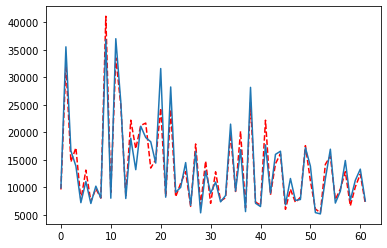

In [78]:
#loocv
from sklearn.feature_selection import RFE
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

model = XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
rfe_loo = RFE(model, 50)
score_loo = cross_val_score(rfe_loo, x_train, y_train, cv = LeaveOneOut(), scoring = 'neg_mean_squared_error')
rfe_loo.fit(x_train, y_train)
import numpy as np
print(f'train session val rmse: {np.sqrt(np.average(score_loo * -1))}')

#evaluating(testdata)
y_hat_loo = rfe_loo.predict(x_test)

from sklearn.metrics import mean_squared_error
print(f'evalscore: {mean_squared_error(y_test.values, y_hat_loo, squared = False)}')

import matplotlib.pyplot as plt
plt.plot(y_hat_loo, '--', c= 'r')
plt.plot(y_test.values)
#그래프 상으로는 적은 데이터 대비 잘 적합하는 것으로 보임

trainsession val rmse: 2148.1724229728193
evalscore: 2638.2269693373605


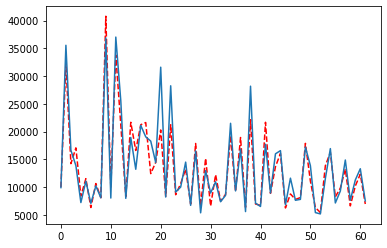

In [83]:
#no cv(holdout, 0.2)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.feature_selection import RFE

hold_x_train, hold_x_val, hold_y_train, hold_y_val = train_test_split(x_train, y_train, test_size = 0.2)#random_state = SEED)
model = XGBRegressor(objective = 'reg:squarederror', random_state = SEED)
rfe_hold = RFE(model, 50)
fit = rfe_hold.fit(hold_x_train, hold_y_train)

#validating(hold_x_test)
y_hat_val = rfe_hold.predict(hold_x_val)
print(f'trainsession val rmse: {mean_squared_error(hold_y_val.values, y_hat_val, squared = False)}')

#evaluating(testdata)
y_hat_hold = rfe_hold.predict(x_test)
print(f'evalscore: {mean_squared_error(y_test.values, y_hat_hold, squared = False)}')

import matplotlib.pyplot as plt
plt.plot(y_hat_hold, '--', c= 'r')
plt.plot(y_test.values)
#그래프 상으로는 적은 데이터 대비 잘 적합하는 것으로 보임